# 🎯 Análise de Eficiência: Veículos Elétricos no Brasil (PBEV 2025)

**Por: Jadson Chagas** | [LinkedIn](https://www.linkedin.com/in/jadson-chagas/) | [GitHub](https://github.com/jeppa1)

Este notebook é uma análise exploratória (EDA) dos veículos elétricos (VEs) disponíveis no Brasil, com base nos dados oficiais do **Programa Brasileiro de Etiquetagem Veicular (PBEV) 2025**, publicado pelo INMETRO.

**Dataset Utilizado:** [Eficiência dos veículos elétricos no Brasil (PBEV-2025)](https://www.kaggle.com/datasets/jadsonchagas/eficincia-veculos-eltricos-brasil-pbev-2025) 

## 1. 🧐 O Problema (Entendimento do Negócio)

Com o rápido crescimento do mercado de VEs, os consumidores se deparam com um dilema: o que define um "bom" carro elétrico? É o **baixo consumo de energia** (ser mais eficiente) ou a **alta autonomia** (ir mais longe)?

Nesta análise, vamos investigar o panorama brasileiro para responder a 3 perguntas-chave:

1.  Quais são os VEs mais eficientes (menor consumo em MJ/km) do Brasil?
2.  Quais VEs têm o maior alcance (autonomia em km)?
3.  Existe uma troca (trade-off)? Carros com maior autonomia são, por necessidade, menos eficientes?

## 2. 🧹 Preparação dos Dados

Os dados brutos do INMETRO (originalmente um PDF) foram pré-processados. Esta análise utiliza a versão limpa, que inclui **172 modelos** de veículos 100% elétricos.

As etapas de limpeza (feitas em um notebook anterior) incluíram:
* Filtro da tabela principal para manter apenas `Tipo_Propulsao == 'ELÉTRICO'`.
* Conversão das colunas `Consumo_MJ_km` e `Autonomia_km` de texto para formato numérico.
* Remoção de valores nulos.

Vamos carregar os dados limpos e verificar sua estrutura.

In [8]:
# Célula de Código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset limpo (do Kaggle)
df = pd.read_csv('/kaggle/input/eficincia-veculos-eltricos-brasil-pbev-2025/pbev_2025_veiculos_eletricos.csv')

print("Estrutura dos Dados Limpos:")
df.info()

Estrutura dos Dados Limpos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Marca              172 non-null    object 
 1   Modelo             172 non-null    object 
 2   Versão             163 non-null    object 
 3   Tipo_Propulsao     172 non-null    object 
 4   Consumo_MJ_km      172 non-null    float64
 5   Autonomia_km       172 non-null    int64  
 6   Classificacao_PBE  172 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.5+ KB


## 3. 📊 Descobertas (Análise Exploratória)

Vamos primeiro olhar para as estatísticas gerais e os rankings.

In [9]:
print("--- Estatísticas Gerais (Média, Mín, Máx) ---")
print(df[['Consumo_MJ_km', 'Autonomia_km']].describe())

--- Estatísticas Gerais (Média, Mín, Máx) ---
       Consumo_MJ_km  Autonomia_km
count     172.000000    172.000000
mean        0.624186    338.406977
std         0.138741     79.236839
min         0.390000    156.000000
25%         0.540000    279.750000
50%         0.600000    340.000000
75%         0.682500    404.000000
max         1.090000    498.000000


### 3.1. Os Campeões da Eficiência ⚡
*(Menor Consumo Energético)*

In [23]:
# Top 10 Campeões da Eficiência

from IPython.display import display, Markdown

# Adiciona um título formatado
display(Markdown("### ⚡ Top 10 Campeões da Eficiência (Menor Consumo MJ/km)"))

# Cria o DataFrame para a tabela
top_eficientes_table = df.sort_values(by='Consumo_MJ_km', ascending=True)[
    ['Marca', 'Modelo', 'Consumo_MJ_km']
].head(10)

# Exibe o DataFrame como uma tabela HTML
top_eficientes_table

### ⚡ Top 10 Campeões da Eficiência (Menor Consumo MJ/km)

,Marca,Modelo,Consumo_MJ_km
2,BYD,DOLPHIN MINI,0.39
0,BYD,DOLPHIN MINI,0.41
1,BYD,DOLPHIN MINI,0.41
90,Geely,EX5,0.42
14,BYD,DOLPHIN,0.42
12,NETA,AYA,0.43
11,NETA,AYA,0.43
158,Renault,E-KWID,0.44
7,Renault,E-KWID,0.44
85,GAC,AION ES,0.45


**Conclusão Parcial:** O ranking de eficiência é dominado por veículos compactos, com o BYD Dolphin Mini liderando (0.39 MJ/km).

### 3.2. Os Maratonistas da Estrada 🔋
*(Maior Autonomia)*

In [22]:
# Top 10 Maratonistas da Estrada

from IPython.display import display, Markdown

# Adiciona um título formatado
display(Markdown("### 🔋 Top 10 Maratonistas da Estrada (Maior Autonomia)"))

# Cria o DataFrame para a tabela
top_autonomia_table = df.sort_values(by='Autonomia_km', ascending=False)[
    ['Marca', 'Modelo', 'Autonomia_km']
].head(10)

# Exibe o DataFrame como uma tabela HTML
top_autonomia_table

### 🔋 Top 10 Maratonistas da Estrada (Maior Autonomia)

,Marca,Modelo,Autonomia_km
74,BMW,IX,498
108,Mercedes-Benz,EQE 350,484
83,CHEVROLET,BLAZER EV,481
110,Mercedes-Benz,EQS 450,472
111,Mercedes-Benz,AMG EQS 53 4M,470
78,BMW,i7,467
136,VOLVO,EX90,459
135,VOLVO,EX90,459
137,VOLVO,EX90,459
171,PORSCHE,TAYCAN,453


**Conclusão Parcial:** O ranking de autonomia é dominado por veículos de luxo (BMW, Mercedes, Volvo). Vemos que não há sobreposição entre os "Top 10" de eficiência e os "Top 10" de autonomia.

## 4. 💡 O Insight Principal: O Custo da Autonomia

Agora, vamos cruzar as duas métricas para entender a relação entre elas. O gráfico abaixo plota cada um dos 172 VEs do Brasil.

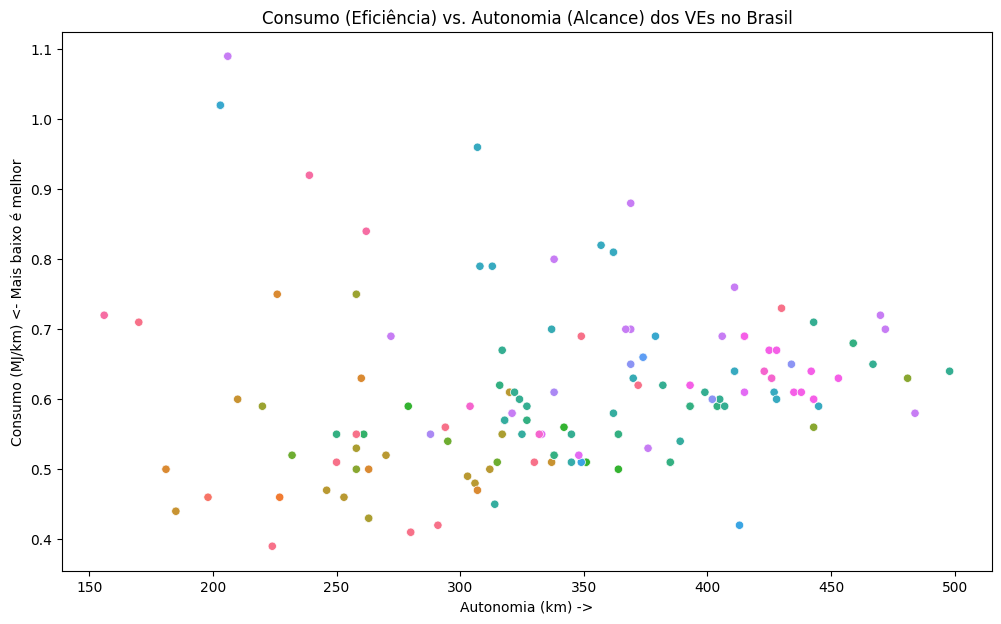

In [18]:
# Scatter Plot

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Autonomia_km', y='Consumo_MJ_km', hue='Marca', legend=None)
plt.title('Consumo (Eficiência) vs. Autonomia (Alcance) dos VEs no Brasil')
plt.xlabel('Autonomia (km) ->')
plt.ylabel('Consumo (MJ/km) <- Mais baixo é melhor')
plt.show()

**Avaliação do Gráfico:**
O gráfico revela claramente que **eficiência e autonomia são estratégias opostas** no mercado atual.

* **Grupo 1 (Canto Inferior Esquerdo):** Carros urbanos e compactos. Eles são extremamente eficientes (baixo consumo), mas têm autonomia limitada (ex: BYD Dolphin Mini, Renault E-Kwid).
* **Grupo 2 (Canto Superior Direito):** Carros de luxo e SUVs grandes. Eles têm alta autonomia (acima de 450 km), mas pagam um preço em eficiência. Para ter baterias tão grandes, os carros são mais pesados e potentes, o que **aumenta o consumo de energia por km**.

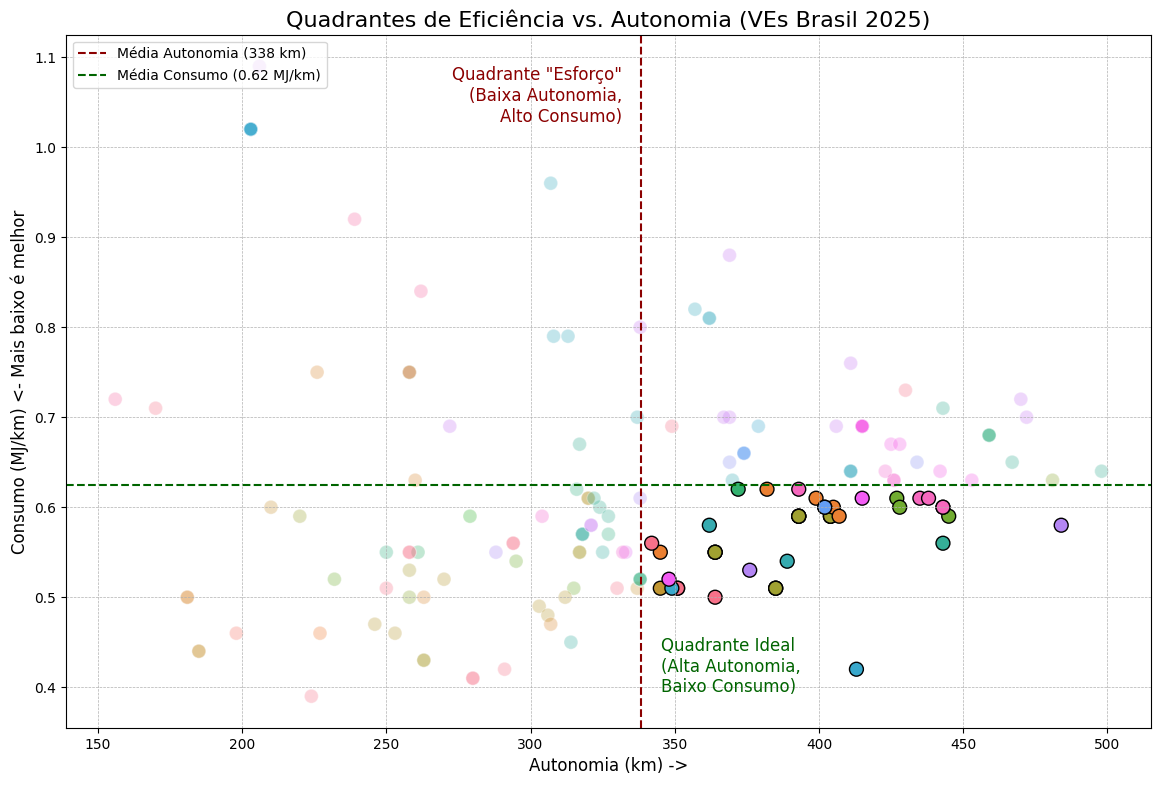

In [19]:
# Scatter Plot

# 1. Obter as médias (o mesmo de antes)
media_autonomia = df['Autonomia_km'].mean()
media_consumo = df['Consumo_MJ_km'].mean()

# 2. Criar o Dataframe do "Quadrante Ideal" (o mesmo de antes)
filtro_ideal = (df['Autonomia_km'] > media_autonomia) & (df['Consumo_MJ_km'] < media_consumo)
df_quadrante_ideal = df[filtro_ideal]

# 3. Criar o Gráfico
plt.figure(figsize=(14, 9))

# Plotar todos os carros (com transparência)
sns.scatterplot(data=df, x='Autonomia_km', y='Consumo_MJ_km', 
                hue='Marca', legend=None, alpha=0.3, s=100)

# Plotar os carros do "Quadrante Ideal" (com destaque)
sns.scatterplot(data=df_quadrante_ideal, x='Autonomia_km', y='Consumo_MJ_km',
                hue='Marca', legend=None, alpha=1.0, s=100, edgecolor='black', linewidth=1)

# --- Nossas Melhorias ---

# 4. Desenhar as linhas das médias
plt.axvline(x=media_autonomia, color='darkred', linestyle='--', label=f'Média Autonomia ({media_autonomia:.0f} km)')
plt.axhline(y=media_consumo, color='darkgreen', linestyle='--', label=f'Média Consumo ({media_consumo:.2f} MJ/km)')

# 5. Adicionar texto para explicar os quadrantes
plt.text(media_autonomia * 1.02, df['Consumo_MJ_km'].min(), 'Quadrante Ideal\n(Alta Autonomia,\nBaixo Consumo)', 
         fontsize=12, color='darkgreen', va='bottom')
plt.text(media_autonomia * 0.98, df['Consumo_MJ_km'].max(), 'Quadrante "Esforço"\n(Baixa Autonomia,\nAlto Consumo)', 
         fontsize=12, color='darkred', ha='right', va='top')

# --- Fim das Melhorias ---

plt.title('Quadrantes de Eficiência vs. Autonomia (VEs Brasil 2025)', fontsize=16)
plt.xlabel('Autonomia (km) ->', fontsize=12)
plt.ylabel('Consumo (MJ/km) <- Mais baixo é melhor', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### 4.1. Avaliação do Gráfico: O "Quadrante Ideal"

O gráfico de dispersão acima é a principal descoberta desta análise. Traçamos as linhas médias do mercado para:
* **Autonomia Média:** 338 km (linha vertical)
* **Consumo Médio:** 0.62 MJ/km (linha horizontal)

Isso divide o mercado em quatro quadrantes, nos permitindo classificar a estratégia de cada veículo:

1.  **Inferior-Direito (O Quadrante Ideal):** Destacado no gráfico, este é o grupo de elite. São veículos que são **melhores que a média em AMBAS as métricas**: consomem menos energia (MJ/km) e, ao mesmo tempo, entregam mais autonomia (km) que a média.

2.  **Inferior-Esquerdo (Compactos Urbanos):** São os carros mais eficientes (baixo consumo), mas com autonomia abaixo da média. Ótimos para a cidade.

3.  **Superior-Direito (Maratonistas de Luxo):** Têm autonomia muito alta, mas com um custo: seu consumo de energia é maior que a média, provavelmente devido ao alto peso e potência.

4.  **Superior-Esquerdo (Quadrante de Esforço):** Veículos que infelizmente estão abaixo da média em ambas as métricas (alto consumo e baixa autonomia).

In [21]:
# Célula de Código: Listando os Veículos do Quadrante Ideal

from IPython.display import display, Markdown

# 1. Calcular as médias
media_autonomia = df['Autonomia_km'].mean()
media_consumo = df['Consumo_MJ_km'].mean()

# 2. Criar o filtro do "Quadrante Ideal"
filtro_ideal = (df['Autonomia_km'] > media_autonomia) & (df['Consumo_MJ_km'] < media_consumo)
df_quadrante_ideal = df[filtro_ideal].copy()

# 3. Criar a métrica "km_por_MJ"
df_quadrante_ideal['km_por_MJ'] = 1 / df_quadrante_ideal['Consumo_MJ_km']

# 4. Preparar o DataFrame final para exibição
df_tabela_ideal = df_quadrante_ideal.sort_values(by='km_por_MJ', ascending=False)[
    ['Marca', 'Modelo', 'Autonomia_km', 'Consumo_MJ_km', 'km_por_MJ']
]

# 5. Exibir um título formatado em Markdown
display(Markdown(f"### 🏆 Carros no Quadrante Ideal (Autonomia > {media_autonomia:.0f}km e Consumo < {media_consumo:.2f} MJ/km)"))

# 6. Exibir o DataFrame
# Ao ser a última expressão na célula, o notebook o renderiza como uma tabela HTML.
df_tabela_ideal

### 🏆 Carros no Quadrante Ideal (Autonomia > 338km e Consumo < 0.62 MJ/km)

,Marca,Modelo,Autonomia_km,Consumo_MJ_km,km_por_MJ
90,Geely,EX5,413,0.42,2.380952
25,MG,MG4,364,0.50,2.000000
89,Geely,EX5,349,0.51,1.960784
44,MG,S5,351,0.51,1.960784
45,MG,S5,351,0.51,1.960784
49,OMODA,E5,345,0.51,1.960784
50,VOLVO,EC40,385,0.51,1.960784
51,VOLVO,EC40,385,0.51,1.960784
52,VOLVO,EC40,385,0.51,1.960784
112,NISSAN,Ariya,348,0.52,1.923077


### Como as Marcas se Comparam?

O gráfico abaixo mostra a estratégia de cada marca.

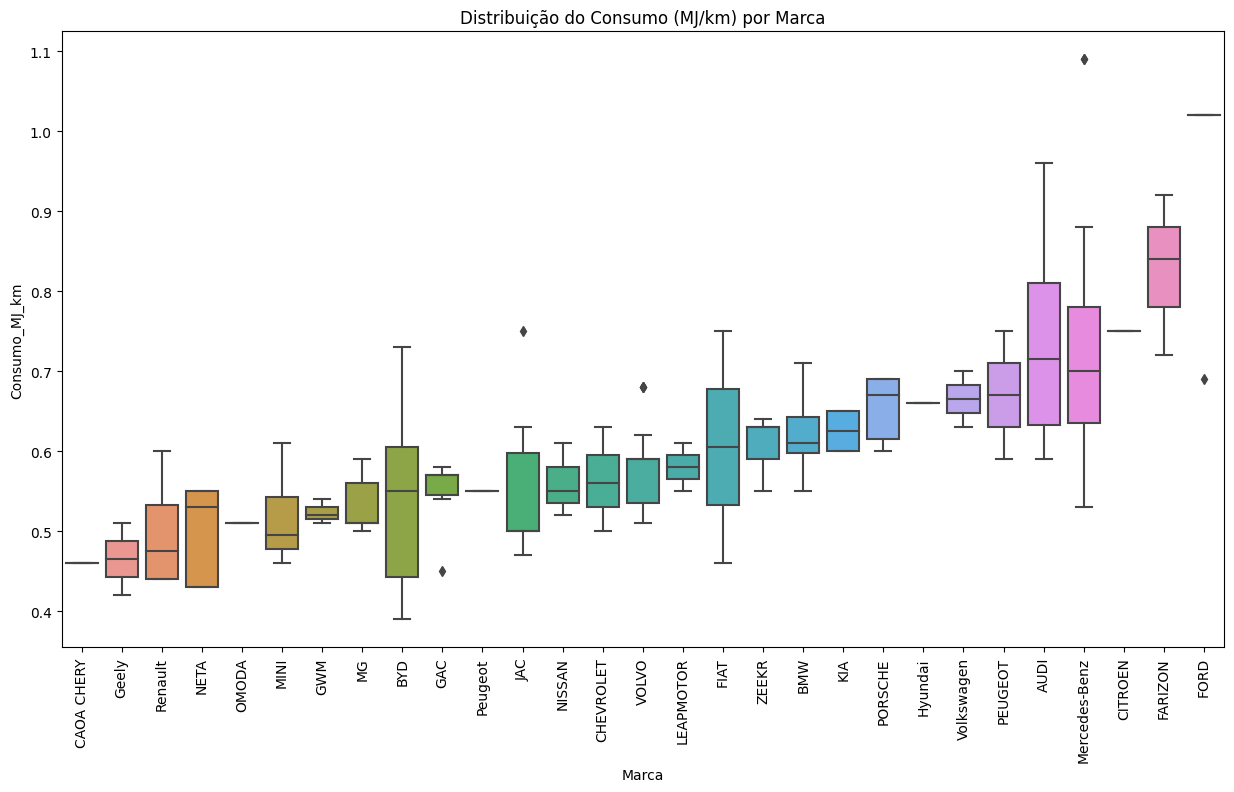

In [15]:
#Box Plot

plt.figure(figsize=(15, 8))
media_consumo_marca = df.groupby('Marca')['Consumo_MJ_km'].mean().sort_values()
sns.boxplot(data=df, x='Marca', y='Consumo_MJ_km', order=media_consumo_marca.index)
plt.title('Distribuição do Consumo (MJ/km) por Marca')
plt.xticks(rotation=90)
plt.show()

**Avaliação do Gráfico:**
Vemos claramente a estratégia das marcas de volume (como BYD, GWM, Renault) focadas em manter o consumo baixo, enquanto as marcas de luxo (Porsche, BMW, Audi) têm uma variação muito maior, focando em performance e autonomia, o que eleva a média de consumo.

In [24]:
# Listando os Veículos do Quadrante Ideal

from IPython.display import display, Markdown

# 1. Calcular as médias
media_autonomia = df['Autonomia_km'].mean()
media_consumo = df['Consumo_MJ_km'].mean()

# 2. Criar o filtro do "Quadrante Ideal"
filtro_ideal = (df['Autonomia_km'] > media_autonomia) & (df['Consumo_MJ_km'] < media_consumo)
df_quadrante_ideal = df[filtro_ideal].copy()

# 3. Criar a métrica "km_por_MJ" (km por MJ) para classificar
df_quadrante_ideal['km_por_MJ'] = 1 / df_quadrante_ideal['Consumo_MJ_km']

# 4. Preparar o DataFrame final para exibição
df_tabela_ideal = df_quadrante_ideal.sort_values(by='km_por_MJ', ascending=False)[
    ['Marca', 'Modelo', 'Autonomia_km', 'Consumo_MJ_km', 'km_por_MJ']
]

# 5. Exibir um título formatado em Markdown
# O título agora inclui os valores médios, substituindo os 'print()' antigos
display(Markdown(f"### 🏆 Carros no Quadrante Ideal (Autonomia > {media_autonomia:.0f}km e Consumo < {media_consumo:.2f} MJ/km)"))

# 6. Exibir o DataFrame
df_tabela_ideal

### 🏆 Carros no Quadrante Ideal (Autonomia > 338km e Consumo < 0.62 MJ/km)

,Marca,Modelo,Autonomia_km,Consumo_MJ_km,km_por_MJ
90,Geely,EX5,413,0.42,2.380952
25,MG,MG4,364,0.50,2.000000
89,Geely,EX5,349,0.51,1.960784
44,MG,S5,351,0.51,1.960784
45,MG,S5,351,0.51,1.960784
49,OMODA,E5,345,0.51,1.960784
50,VOLVO,EC40,385,0.51,1.960784
51,VOLVO,EC40,385,0.51,1.960784
52,VOLVO,EC40,385,0.51,1.960784
112,NISSAN,Ariya,348,0.52,1.923077


## 5. 🚀 Conclusão

A análise da tabela PBEV 2025 nos mostra que, no Brasil, o consumidor de VE precisa fazer uma escolha clara:

1.  **Eficiência Urbana:** Carros compactos (como o BYD Dolphin Mini) são os reis da eficiência energética (0.39 MJ/km), ideais para o dia a dia na cidade.
2.  **Luxo de Longa Distância:** Carros premium (como o BMW iX) oferecem grande autonomia (498 km), mas essa capacidade tem um custo energético, tornando-os menos eficientes (0.60+ MJ/km).

O "carro perfeito" (baixo consumo E alta autonomia) ainda não existe de forma acessível.

**Obrigado por ler!** Sinta-se à vontade para usar este dataset e compartilhar seus próprios *insights*.